#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

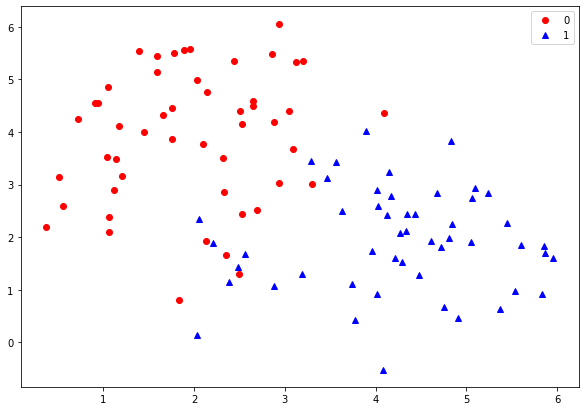

In [3]:
plt.figure(figsize=(10, 7))
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='r', label='0')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='b', label='1')
plt.legend();

In [4]:
class Logreg:
    def __init__(self, num_iter,lr):
        self.num_iter = num_iter
        self.lr = lr
        
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        X= np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.W = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            
            h = self.__sigmoid(np.dot(X, self.W))
            self.W -= self.lr * (np.dot(X.T, (h - y)) / y.size)
            
            #update
            h = self.__sigmoid(np.dot(X, self.W))
            loss = self.__loss(h, y)
                
    def predict_prob(self, X):
        X= np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return self.__sigmoid(np.dot(X, self.W))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [5]:

model = Logreg(num_iter=400000,lr=0.2)
model.fit(X, y)

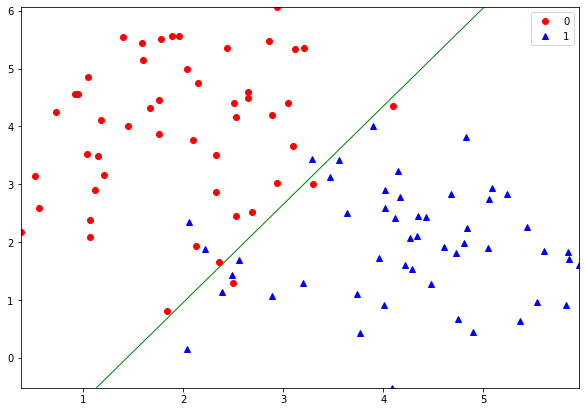

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='r', label='0')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='b', label='1')
plt.legend()

#inspired from github
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.55], linewidths=1, colors='green')
